<a href="https://colab.research.google.com/github/ria-heikkila/Handwritten_numbers_recognition/blob/master/%E6%89%8B%E6%9B%B8%E3%81%8D%E6%95%B0%E5%AD%97%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#必要なライブラリをインポートする
import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np

In [0]:
#手書き数字の画像をinlineとして表示させるためにmatplotlibを設定しておく
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
#データセットをダウンロードする
(img_train, label_train), (img_test, label_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


ダウンロードしたデータを確認する

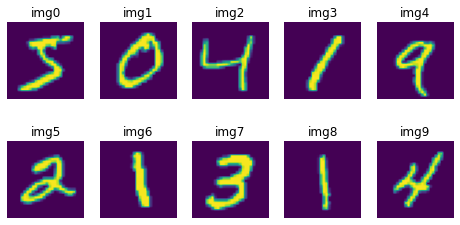

In [0]:
#先頭の10コの配列データを画像に変換して表示する
plt.figure(figsize=(8,4))
for i in range(10):     # カウンター0から9まで設定
  plt.subplot(2,5,i+1)  # 2行　5列で設定
  plt.axis("off")
  plt.title("img" + str(i)) #何番目の画像なのか示すタイトルを追加
  plt.imshow(img_train[i].reshape(28,28)) #画像を一枚ずつ表示

In [0]:
# バッチ1つに対する画像の枚数
batch_size = 128
# 出力する値の数（数字予測なので、「0,1,2,3,4,5,6,7,8,9」の10コ）
num_class = 10
# トレーニングを行う回数
epochs = 20

In [0]:
label_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

MNISTの画像データは、各ピクセルが0以上255以下の整数になっているので、<br>
扱いにくいので、255.0で割って0から1の間に収める。

In [0]:
#データを正規化する
img_train, img_test = img_train/255.0, img_test/255.0

In [0]:
#ラベルのデータをワンホットになるように変形する
label_train = to_categorical(label_train, 10)
label_test = to_categorical(label_test, 10)

*たとえば 7 であれば [0,0,0,0,0,0,0,1,0,0] になるようにする

In [0]:
#モデル定義
model = keras.models.Sequential([ #ニューラルネットワークの各層を順番につなげたモデル
    keras.layers.Flatten(),#を直列に並べるデータ
    #全結合層について：　
    #全ての入力層のノードは結合するために全結合層を使い、512個のノードを設定する。
    #ノードの数は必ず512に設定する必要がない。色々試してみて、モデルの精度がどう変わるか見てみてください。楽しいです！
    keras.layers.Dense(512, activation='relu'), #'relu'とは、正のところはそのまま表示して、マイナスの値を0にする活性化関数である
    keras.layers.Dropout(0.2), #指定した割合（今回は20%）のノードをランダムに選んで出力を 0 にする（値を捨てる）ことで過学習（overfitting）を防ぐ
    keras.layers.Dense(num_class, activation='softmax') #活性化関数はSoftmaxを使う（Softmaxは、出力されたごちゃごちゃした数字を綺麗に、全体の確率が100%(1.0)になるように調整してくれる）
])

In [0]:
# lossは、損失関数；optimizerは、最適化アルゴリズム（adam以外に様々なものがある。例えば、RMSpropも結構人気）；metricsは、評価関数（通常はmetrics=[‘accuracy’]を指定する）
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#学習を行う
model.fit(img_train, label_train, batch_size=batch_size, epochs=epochs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2825 - acc: 0.9188
Epoch 2/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1209 - acc: 0.9648
Epoch 3/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0841 - acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0638 - acc: 0.9812
Epoch 5/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0487 - acc: 0.9860
Epoch 6/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0409 - acc: 0.9870
Epoch 7/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0331 - acc: 0.9902
Epoch 8/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0278 - acc: 0.9919
Epoch 9/20
60000/60000 [==============================] - 1s 19us/sample - loss:

In [0]:
#テストデータに対する精度検証
model.evaluate(img_test, label_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.0672 - acc: 0.9823


[0.06720240582531414, 0.9823]

In [0]:
#モデルを保存する
#保存する際に、名前（なんでもいい）＋　フォーマット（h5）を指定する
#フォルダーの中に保存したいなら、パスも指定する
#パスの指定なしで保存したモデルのファイルの格納場所を確認する時に、画面の一番左にある「フォルダー」のマークをクリックすると、そこにあるはず
#モデルのファイルを右クリックするとローカルにダウンロードできる
model.save('./handwritten_digits.h5')

In [0]:
#予測して、予測結果を変数に代入する
predictions = model.predict(img_test[:25])

In [0]:
#予測結果を見やするする
predicted = np.argmax(predictions, axis=1)

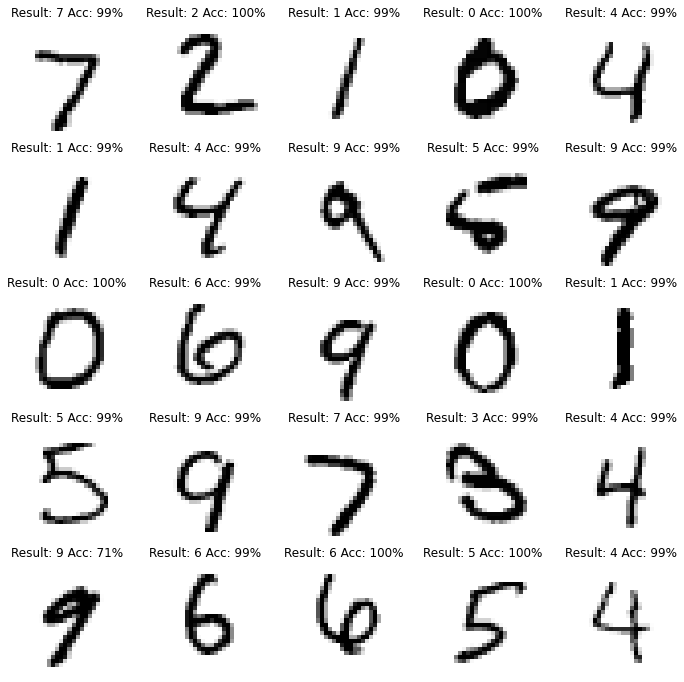

In [0]:
#予測結果を綺麗に表示する
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis("off")
    percentage = int(predictions[i][predicted[i]] * 100)
    plt.title("Result: " + str(predicted[i]) + " Acc: " + str(percentage) + "%") 
    plt.imshow(img_test[i], cmap=plt.cm.binary)